In [3]:
#Install libraries
!pip install pystan~=2.14
!pip install fbprophet

  Using cached pystan-2.19.1.1.tar.gz (16.2 MB)
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for pystan
  Running setup.py clean for pystan
Failed to build pystan
ERROR: Could not build wheels for pystan, which is required to install pyproject.toml-based projects
  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Preparing metadata (setup.py) ... done
  Using cached cmdstanpy-0.9.5-py3-none-any.whl (37 kB)
  Using cached pystan-3.7.0-py3-none-any.whl (13 kB)
  Using cached setuptools_git-1.2-py2.py3-none-any.whl (10 kB)
  Using cached clikit-0.6.2-py2.py3-none-any.whl (91 kB)
  Using cached httpstan-4.10.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (44.4 MB)
  Using cached pysimdjson-5.0.2-cp310-cp310-manylinux_2_17_

In [5]:
#Import library
import itertools
from fbprophet import Prophet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

ModuleNotFoundError: ignored

In [ ]:
#Read file
df=pd.read_csv("ffpt.csv")
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,11/30/15,14.4635,14.6731,14.6731,14.4635,2.97M,-1.23%
1,12/1/15,14.4336,14.5534,14.6133,14.4036,1.66M,-0.21%
2,12/2/15,14.4935,14.4336,14.5833,14.4336,1.79M,0.42%
3,12/3/15,14.5234,14.5234,14.5833,14.4635,912.10K,0.21%
4,12/4/15,14.3437,14.5234,14.5234,14.2839,2.29M,-1.24%


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1752 entries, 0 to 1751
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      1752 non-null   object 
 1   Price     1752 non-null   float64
 2   Open      1752 non-null   float64
 3   High      1752 non-null   float64
 4   Low       1752 non-null   float64
 5   Vol.      1752 non-null   object 
 6   Change %  1752 non-null   object 
dtypes: float64(4), object(3)
memory usage: 95.9+ KB


In [ ]:
df.describe()

,Price,Open,High,Low
count,1752.000000,1752.000000,1752.000000,1752.000000
mean,37.590290,37.585471,38.022898,37.181036
std,23.976349,23.985870,24.316608,23.659609
min,13.415400,13.415400,13.505300,13.265700
25%,20.655150,20.675900,20.812050,20.484550
50%,26.589450,26.772400,26.973600,26.418600
75%,53.756750,53.756750,54.441700,53.405550
max,96.049800,95.967400,97.944400,94.896500


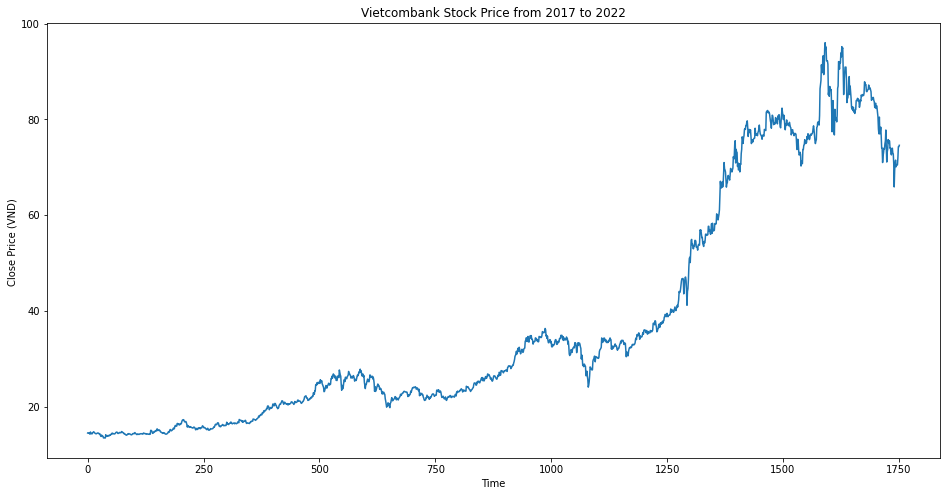

In [ ]:
#visualize the FPT stock price from 2017 to 2022
plt.figure(figsize=(16,8))
plt.title('Vietcombank Stock Price from 2017 to 2022')
plt.xlabel('Time')
plt.ylabel('Close Price (VND) ')
plt.plot(df['Price'])
plt.show()

In [ ]:
#Select Variables
df = df.loc[:,["Date","Price"]]
df

,Date,Price
0,11/30/15,14.4635
1,12/1/15,14.4336
2,12/2/15,14.4935
3,12/3/15,14.5234
4,12/4/15,14.3437
...,...,...
1747,11/24/22,70.5000
1748,11/25/22,72.0000
1749,11/28/22,74.3000
1750,11/29/22,74.3000


In [ ]:

#Remaining variable
df = df.rename(columns = {'Price' : 'y'})
df = df.rename(columns = {'Date' : 'ds'})
df

,ds,y
0,11/30/15,14.4635
1,12/1/15,14.4336
2,12/2/15,14.4935
3,12/3/15,14.5234
4,12/4/15,14.3437
...,...,...
1747,11/24/22,70.5000
1748,11/25/22,72.0000
1749,11/28/22,74.3000
1750,11/29/22,74.3000


In [ ]:
#Set training and test set (Rate: 70% - 30%)
train_set = df.sample(frac=0.7, random_state=0)
test_set = df.drop(train_set.index)

In [ ]:
#Build Prophet model
p = Prophet(growth = "linear",
            yearly_seasonality = True,
            weekly_seasonality = True,
            daily_seasonality = False,
            seasonality_mode = "multiplicative",
            seasonality_prior_scale = 10,
            holidays_prior_scale = 10,
            changepoint_prior_scale = 0.05)
p.fit(train_set)
Prediction = p.predict(pd.DataFrame({'ds':test_set['ds']}))
y_Actual = test_set['y']
y_Predicted = Prediction['yhat']
y_Predicted = y_Predicted.astype(int)
mean_absolute_error(y_Actual, y_Predicted)

1.6678235741444865

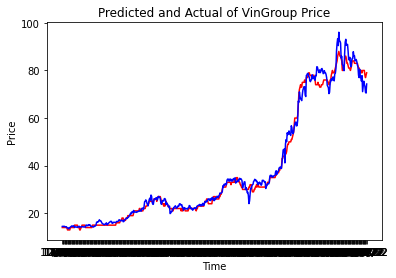

In [ ]:
plt.plot(test_set['ds'],y_Predicted,'r')
plt.plot(test_set['ds'],y_Actual,'b')
plt.xlabel("Time")
plt.ylabel("Price")
plt.title("Predicted and Actual of VinGroup Price")
plt.show()

In [ ]:
#Using RMSE and MAPE to measure the accuracy of a model.
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
mape = mean_absolute_percentage_error(y_Actual, y_Predicted)
mse = mean_squared_error(y_Actual, y_Predicted)
rmse = np.sqrt(mse)
print(f"MAPE: {mape * 100:.2f}%")
print(f"RMSE: {rmse:.0f}")

MAPE: 4.40%
RMSE: 2


In [ ]:
m = Prophet()
m.fit(df)
future = m.make_future_dataframe(30)
forecast = m.predict(future)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
#get prediction data
test_days = 30
prediction_set = forecast.yhat[-test_days:]
prediction_set

1752    83.199346
1753    83.295411
1754    83.578570
1755    83.637501
1756    83.264615
1757    83.378702
1758    83.491304
1759    83.553377
1760    83.594461
1761    83.823222
1762    83.829617
1763    83.407254
1764    83.476006
1765    83.548353
1766    83.576028
1767    83.589163
1768    83.796819
1769    83.789144
1770    83.359731
1771    83.428236
1772    83.506728
1773    83.546349
1774    83.576480
1775    83.805294
1776    83.821940
1777    83.418931
1778    83.514795
1779    83.620454
1780    83.685919
1781    83.739487
Name: yhat, dtype: float64

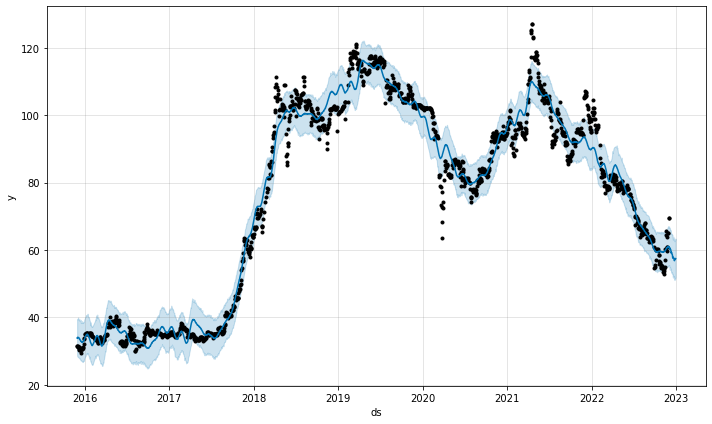

In [ ]:
#visualization forecast
p.plot(forecast);

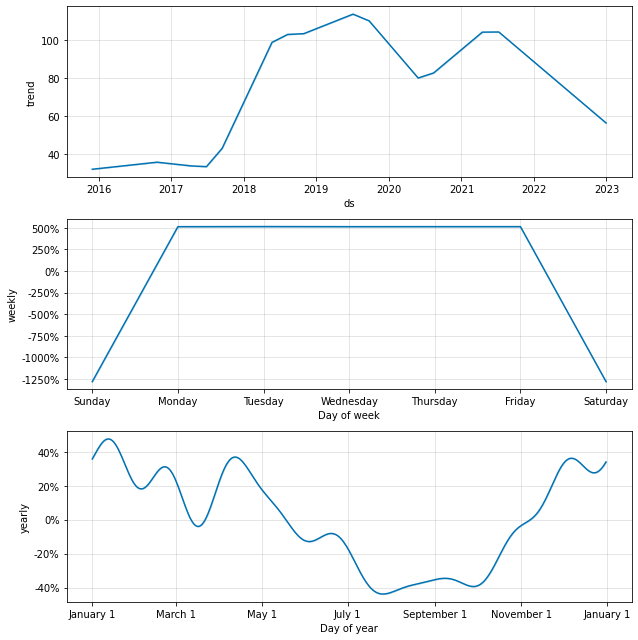

In [ ]:
p.plot_components(forecast);